# Bike Sharing Rental Prediction  
## Contents
1. [Business Problem Understanding](#business-problem-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preprocessing](#data-preprocessing)
4. [Modeling](#modeling)
5. [Conclusion](#conclusion)
6. [Recommendations](#recommendations)
  
## 1. Business Problem Understanding  
  
### Context  
Sistem bike-sharing adalah sistem penyewaan sepeda otomatis yang memungkinkan pengguna untuk menyewa dan mengembalikan sepeda dari dan ke stasiun yang berbeda. Data yang dihasilkan oleh sistem ini sangat berguna untuk penelitian dan analisis, terutama dalam memantau mobilitas di kota.  
  
### Problem Statement  
Tujuan utama dari analisis ini adalah untuk memahami pola penggunaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, dan waktu, serta membangun model prediktif untuk jumlah penyewaan sepeda. 
  
### Goals  
- Menganalisis faktor-faktor yang mempengaruhi jumlah penyewaan sepeda.
- Membangun model prediktif untuk memperkirakan jumlah penyewaan sepeda berdasarkan berbagai fitur. 
  
### Analytic Approach  
- Eksplorasi data untuk memahami distribusi dan hubungan antar fitur.
- Pembuatan model regresi untuk memprediksi jumlah penyewaan sepeda.

### Metric Evaluation  
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)
  
## 2. Data Understanding
Dataset yang digunakan adalah data penyewaan sepeda yang mencakup informasi tentang penyewaan sepeda harian. Setiap baris data merepresentasikan informasi terkait penyewaan sepeda.

### Attributes Information
| Attribute  | Data Type | Description                                      |
|------------|-----------|--------------------------------------------------|
| dteday     | Date      | Tanggal penyewaan                                |
| season     | Integer   | Musim (1: winter, 2: spring, 3: summer, 4: fall) |
| hr         | Integer   | Jam (0 to 23)                                   |
| holiday    | Integer   | Hari libur (0: tidak, 1: ya)                   |
| temp       | Float     | Suhu normalisasi dalam Celsius                   |
| atemp      | Float     | Suhu yang dirasakan dalam Celsius                |
| hum        | Float     | Kelembapan normalisasi                           |
| casual     | Integer   | Jumlah penyewaan oleh pengguna biasa             |
| registered | Integer   | Jumlah penyewaan oleh pengguna terdaftar        |
| cnt        | Integer   | Total jumlah penyewaan sepeda   


## 3. Data Preprocessing 
Pada tahap ini, kita akan melakukan cleaning dan transformasi data agar siap untuk pemodelan.  

Import Library

In [122]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
import warnings  
warnings.filterwarnings('ignore')  


Load Dataset


In [123]:
df = pd.read_csv('data_bike_sharing.csv')  
df.head()  

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


Eksplorasi Data

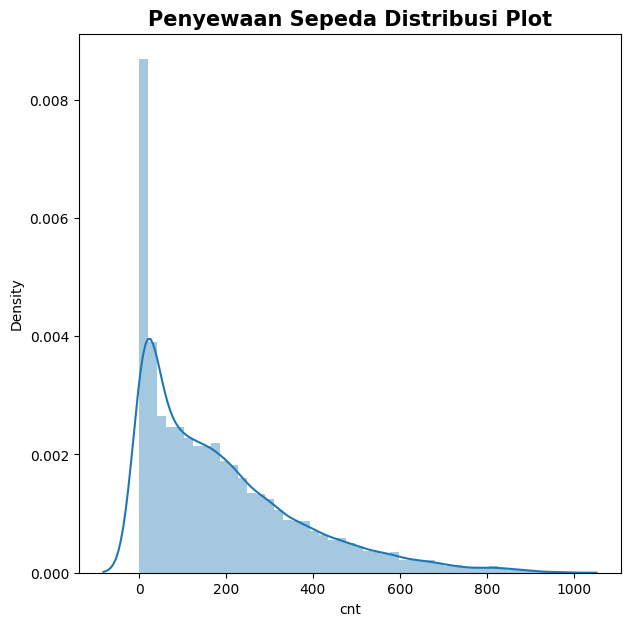

In [124]:
# Plot distribusi fitur 'cnt'  
plt.figure(figsize=(7, 7))  
sns.distplot(df['cnt'])  
plt.title('Penyewaan Sepeda Distribusi Plot', size=15, weight='bold');  


Dari visualisasi distribusi penyewaan sepeda (cnt), berikut adalah analisis yang dapat diambil:
### Analisis Distribusi

1. **Distribusi Miring (Skewed)**:
   - Distribusi menunjukkan pola yang sangat miring ke kiri, dengan banyak nilai rendah dan sedikit nilai tinggi. Ini berarti bahwa sebagian besar penyewaan sepeda berada di kisaran yang lebih rendah, sementara hanya ada beberapa kejadian penyewaan yang sangat tinggi.

2. **Puncak di Nol**:
   - Ada puncak yang signifikan di sekitar nilai nol, menunjukkan bahwa banyak hari mungkin tidak ada penyewaan sepeda sama sekali. Ini bisa menjadi indikasi bahwa ada banyak hari di mana tidak ada aktivitas penyewaan.

3. **Konsentrasi di Rentang Rendah**:
   - Sebagian besar data terdistribusi di bawah 200 penyewaan, dengan frekuensi yang menurun secara signifikan untuk nilai yang lebih tinggi. Ini menunjukkan bahwa model mungkin perlu menangkap pola yang berbeda untuk nilai rendah dan tinggi.

4. **Outlier Potensial**:
   - Meskipun tidak terlihat jelas dalam plot ini, ada kemungkinan bahwa ada beberapa outlier di bagian kanan distribusi, di mana nilai penyewaan yang sangat tinggi mungkin muncul. Ini perlu dianalisis lebih lanjut.

### Implikasi untuk Model

1. **Transformasi Data**:
   - Mengingat distribusi yang miring, Mungkin akan mempertimbangkan transformasi data (seperti logaritma) untuk membantu model menangkap pola dengan lebih baik. Transformasi ini dapat membantu mengurangi skewness dan membuat data lebih mendekati distribusi normal.

2. **Model yang Berbeda**:
   - Model yang lebih kompleks seperti Random Forest atau XGBoost mungkin lebih baik dalam menangkap pola dalam data yang tidak terdistribusi normal.

3. **Analisis Outlier**:
   - Lakukan analisis lebih lanjut untuk mengidentifikasi apakah ada outlier yang mungkin mempengaruhi model. Outlier dapat mempengaruhi hasil prediksi dan metrik evaluasi.


### Data Cleaning

In [125]:
# 1. Menampilkan informasi awal tentang dataset  
print("Informasi Awal Dataset:")  
print(df.info())  
  
# 2. Menangani nilai yang hilang  
# Memeriksa nilai yang hilang  
print("\nJumlah Nilai yang Hilang di Setiap Kolom:")  
print(df.isnull().sum())  
  
# Jika ada nilai yang hilang, Anda bisa memutuskan untuk menghapus atau mengisi  
# Contoh: Mengisi nilai yang hilang dengan median atau mean  
# df['column_name'].fillna(df['column_name'].median(), inplace=True)  
  
# 3. Mengonversi kolom 'dteday' ke tipe datetime  
df['dteday'] = pd.to_datetime(df['dteday'])  
  
# 4. Mengonversi kolom 'season', 'holiday', dan 'weathersit' ke tipe kategorikal  
df['season'] = df['season'].astype('category')  
df['holiday'] = df['holiday'].astype('category')  
df['weathersit'] = df['weathersit'].astype('category')  
  
# 5. Memeriksa dan menghapus duplikasi  
print("\nJumlah Duplikasi Sebelum Dihapus:", df.duplicated().sum())  
df.drop_duplicates(inplace=True)  
print("Jumlah Duplikasi Setelah Dihapus:", df.duplicated().sum())  
  
# 6. Memeriksa outlier (opsional)  
# Anda bisa menggunakan metode seperti IQR atau Z-score untuk mendeteksi outlier  
# Contoh: Menggunakan IQR untuk mendeteksi outlier pada kolom 'cnt'  
Q1 = df['cnt'].quantile(0.25)  
Q3 = df['cnt'].quantile(0.75)  
IQR = Q3 - Q1  
df = df[(df['cnt'] >= (Q1 - 1.5 * IQR)) & (df['cnt'] <= (Q3 + 1.5 * IQR))]  
  
# 7. Menampilkan informasi akhir tentang dataset  
print("\nInformasi Akhir Dataset:")  
df.info()
  
# 8. Menampilkan beberapa baris pertama dari DataFrame  
print("\nBeberapa Baris Pertama dari DataFrame:")  
df.head()


Informasi Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB
None

Jumlah Nilai yang Hilang di Setiap Kolom:
dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi Sebelum Dihapus: 

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
5,2012-10-01,0.72,1,0,4,0.4545,0.46,0,6,39,45


## Analisis Fitur


### Jumlah pengguna berdasarkan musim 

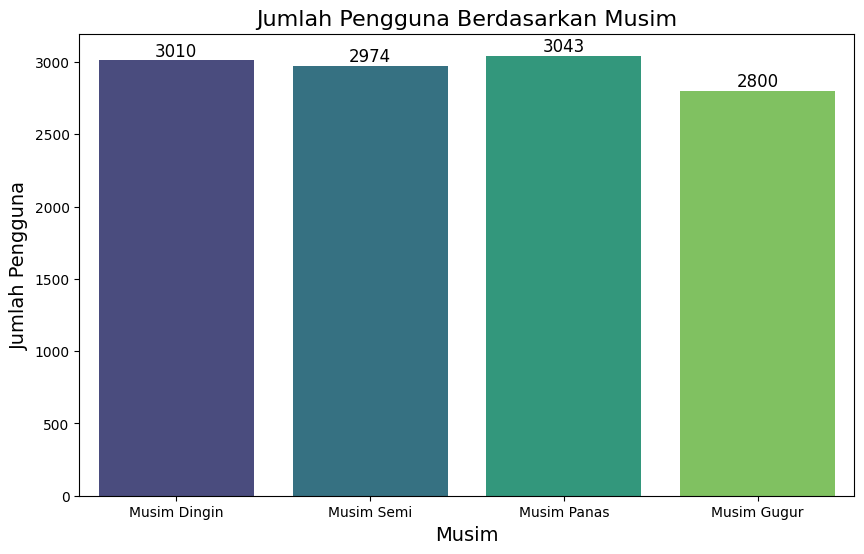

In [126]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Hitung jumlah pengguna berdasarkan musim  
season_counts = df['season'].value_counts().sort_index()  
  
# Buat visualisasi  
plt.figure(figsize=(10, 6))  
bar_plot = sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')  
plt.title('Jumlah Pengguna Berdasarkan Musim', fontsize=16)  
plt.xlabel('Musim', fontsize=14)  
plt.ylabel('Jumlah Pengguna', fontsize=14)  
plt.xticks(ticks=range(4), labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])  
  
# Tambahkan angka di atas setiap bar  
for p in bar_plot.patches:  
    bar_plot.annotate(f'{int(p.get_height())}',   
                      (p.get_x() + p.get_width() / 2., p.get_height()),   
                      ha='center', va='bottom', fontsize=12)  
  
plt.show()  



Dari visualisasi yang menunjukkan jumlah pengguna berdasarkan musim, berikut adalah analisis yang dapat diambil:

### Analisis Jumlah Pengguna Berdasarkan Musim

1. **Musim Panas Memiliki Jumlah Pengguna Tertinggi**:
   - Musim panas (3043 pengguna) adalah musim dengan jumlah penyewa tertinggi. Ini menunjukkan bahwa banyak orang lebih cenderung menggunakan sepeda selama musim panas, mungkin karena cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.

2. **Musim Dingin dan Musim Gugur**:
   - Musim dingin (3010 pengguna) dan musim gugur (2800 pengguna) menunjukkan jumlah pengguna yang lebih rendah dibandingkan musim panas, tetapi masih cukup tinggi. Musim dingin memiliki jumlah pengguna yang hampir sama dengan musim semi, menunjukkan bahwa meskipun cuaca lebih dingin, penggunaan sepeda tetap ada.
   - Musim gugur memiliki jumlah pengguna terendah (2800 pengguna), yang mungkin disebabkan oleh cuaca yang mulai dingin dan berkurangnya aktivitas luar ruangan.

3. **Musim Semi**:
   - Musim semi (2974 pengguna) menunjukkan jumlah pengguna yang sedikit lebih rendah dibandingkan musim dingin dan jauh lebih rendah dibandingkan musim panas. Ini mungkin menunjukkan bahwa pengguna sepeda mulai meningkat seiring dengan datangnya cuaca yang lebih hangat.

4. **Konsistensi Penggunaan**:
   - Secara keseluruhan, jumlah pengguna di semua musim cukup konsisten, dengan perbedaan yang tidak terlalu besar antara musim dingin, semi, dan gugur. Ini menunjukkan bahwa sepeda digunakan secara aktif sepanjang tahun, meskipun ada fluktuasi berdasarkan musim.

### Implikasi untuk Model dan Strategi

1. **Fokus pada Musim Panas**:
   - Mengingat tingginya penggunaan sepeda di musim panas, strategi pemasaran dan promosi dapat difokuskan pada periode ini untuk meningkatkan penyewaan lebih lanjut.

2. **Analisis Cuaca**:
   - Melakukan analisis lebih lanjut tentang bagaimana kondisi cuaca spesifik (seperti suhu dan kelembapan) mempengaruhi penggunaan sepeda di setiap musim dapat memberikan wawasan tambahan untuk meningkatkan layanan.

3. **Peningkatan Infrastruktur**:
   - Mengingat tingginya penggunaan sepeda, mungkin ada kebutuhan untuk meningkatkan infrastruktur sepeda, seperti jalur sepeda dan tempat parkir, terutama selama musim panas.

4. **Segmentasi Pengguna**:
   - Mempertimbangkan segmentasi pengguna berdasarkan musim dapat membantu dalam merancang program loyalitas atau promosi yang lebih efektif.

Visualisasi ini memberikan wawasan yang jelas tentang pola penggunaan sepeda berdasarkan musim. Dengan memahami tren ini, Anda dapat mengambil langkah-langkah strategis untuk meningkatkan penggunaan sepeda dan memenuhi kebutuhan pengguna di berbagai musim.

### Jumlah pengguna berdasarkan jam  

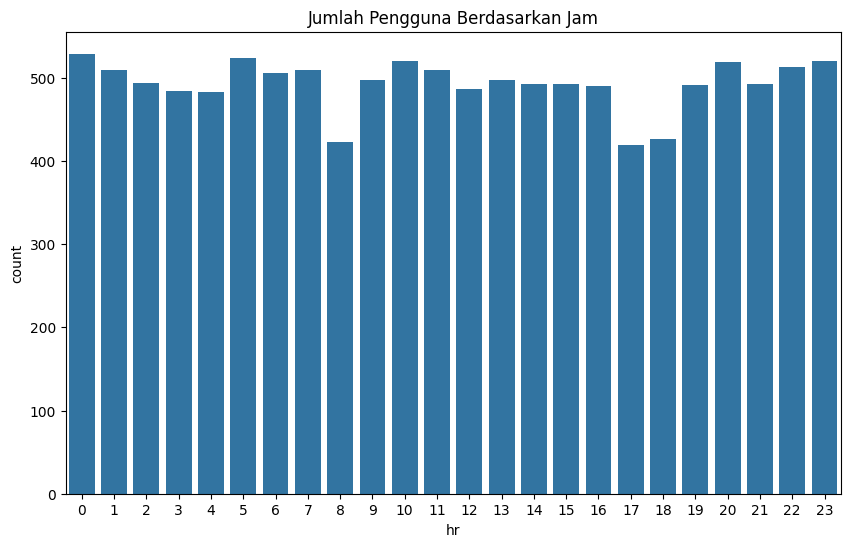

In [127]:
# Plot jumlah pengguna berdasarkan jam  
plt.figure(figsize=(10, 6))  
sns.countplot(x='hr', data=df)  
plt.title('Jumlah Pengguna Berdasarkan Jam');  


Dari visualisasi yang menunjukkan jumlah pengguna berdasarkan jam, berikut adalah analisis yang dapat diambil:

### Analisis Jumlah Pengguna Berdasarkan Jam

1. **Distribusi Pengguna yang Merata**:
   - Grafik menunjukkan distribusi jumlah pengguna yang relatif merata sepanjang hari, dengan sedikit variasi antara jam-jam. Ini menunjukkan bahwa penggunaan sepeda tidak terfokus pada waktu tertentu, tetapi lebih tersebar sepanjang hari.

2. **Puncak Penggunaan**:
   - Beberapa jam, seperti jam 8 dan 17, menunjukkan jumlah pengguna yang sedikit lebih tinggi dibandingkan jam lainnya. Ini mungkin mencerminkan pola penggunaan yang umum, di mana orang cenderung menyewa sepeda untuk pergi bekerja atau pulang dari kerja.

3. **Jam Malam**:
   - Jam-jam malam (seperti 0 hingga 5) menunjukkan jumlah pengguna yang jauh lebih rendah. Ini mungkin disebabkan oleh kurangnya aktivitas luar ruangan di malam hari, atau karena banyak orang lebih memilih untuk tidak menggunakan sepeda saat gelap.

4. **Konsistensi Sepanjang Hari**:
   - Meskipun ada puncak di beberapa jam, secara keseluruhan, jumlah pengguna tetap cukup konsisten di jam-jam lainnya. Ini menunjukkan bahwa ada basis pengguna yang stabil yang menggunakan sepeda sepanjang hari, bukan hanya pada jam sibuk.

### Implikasi untuk Model dan Strategi

1. **Fokus pada Jam Sibuk**:
   - Mengingat puncak penggunaan di jam-jam tertentu, strategi pemasaran atau promosi dapat difokuskan pada jam-jam tersebut untuk menarik lebih banyak pengguna.

2. **Peningkatan Infrastruktur**:
   - Dengan adanya penggunaan yang lebih tinggi pada jam-jam tertentu, mungkin ada kebutuhan untuk meningkatkan infrastruktur sepeda, seperti jalur sepeda dan tempat parkir, untuk mengakomodasi lonjakan pengguna.

3. **Analisis Lebih Lanjut**:
   - Melakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi penggunaan sepeda pada jam-jam tertentu, seperti cuaca, hari kerja vs. akhir pekan, atau acara khusus, dapat memberikan wawasan tambahan untuk meningkatkan layanan.

Visualisasi ini memberikan wawasan yang jelas tentang pola penggunaan sepeda berdasarkan jam. Dengan memahami tren ini, Stakeholder dapat mengambil langkah-langkah strategis untuk meningkatkan penggunaan sepeda dan memenuhi kebutuhan pengguna di berbagai waktu sepanjang hari.

### Penambahan Fitur Waktu
### 1. Fitur Sebelum Penambahan Fitur Waktu

Sebelum menambahkan fitur waktu, kita akan menggunakan fitur yang sudah ada dalam dataset. Misalnya, fitur yang mungkin sudah ada adalah:

- **season**: Musim (musim dingin, semi, panas, gugur)
- **weathersit**: Kondisi cuaca
- **holiday**: Apakah hari tersebut adalah hari libur
- **temp**: Suhu
- **hum**: Kelembapan
- **windspeed**: Kecepatan angin

#### Kode untuk Menyiapkan Data Sebelum Penambahan Fitur Waktu

In [128]:
# Misalkan df adalah DataFrame yang berisi data
X_before = df[['season', 'weathersit', 'holiday', 'temp', 'hum', 'atemp', 'hr']]  
y = df['cnt']  
  
# Split data  
X_train_before, X_test_before, y_train, y_test = train_test_split(X_before, y, test_size=0.3, random_state=1)  
  
# Latih model Random Forest sebelum penambahan fitur waktu  
rf_model_before = RandomForestRegressor(random_state=1)  
rf_model_before.fit(X_train_before, y_train)  
  
# Prediksi pada data uji  
y_pred_before = rf_model_before.predict(X_test_before)  

### 2. Fitur Setelah Penambahan Fitur Waktu

Setelah menambahkan fitur waktu, kita akan menambahkan fitur jam, hari dalam seminggu, dan bulan ke dalam dataset.

#### Kode untuk Menambahkan Fitur Waktu

In [129]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error  
  
# Misalkan df adalah DataFrame yang berisi data Anda  
# Periksa tipe data kolom  
print(df.dtypes)  
  
# Konversi kolom dteday ke datetime jika belum  
df['dteday'] = pd.to_datetime(df['dteday'])  
  
# Tambahkan kolom jam, hari dalam seminggu, dan bulan  
df['hour'] = df['dteday'].dt.hour  
df['day_of_week'] = df['dteday'].dt.dayofweek  # 0 = Senin, 6 = Minggu  
df['month'] = df['dteday'].dt.month  # 1 = Januari, 12 = Desember  
  
# Siapkan fitur sebelum penambahan fitur waktu  
X_before = df[['season', 'weathersit', 'holiday', 'temp', 'hum', 'atemp', 'hr']]  
y = df['cnt']  
  
# Split data  
X_train_before, X_test_before, y_train, y_test = train_test_split(X_before, y, test_size=0.3, random_state=1)  
  
# Latih model Random Forest sebelum penambahan fitur waktu  
rf_model_before = RandomForestRegressor(random_state=1)  
rf_model_before.fit(X_train_before, y_train)  
  
# Prediksi pada data uji  
y_pred_before = rf_model_before.predict(X_test_before)  
  
# Siapkan fitur setelah penambahan fitur waktu  
X_after = df[['season', 'weathersit', 'holiday', 'temp', 'hum', 'atemp', 'hour', 'day_of_week', 'month']]  
  
# Split data  
X_train_after, X_test_after, y_train, y_test = train_test_split(X_after, y, test_size=0.3, random_state=1)  
  
# Latih model Random Forest setelah penambahan fitur waktu  
rf_model_after = RandomForestRegressor(random_state=1)  
rf_model_after.fit(X_train_after, y_train)  
  
# Prediksi pada data uji  
y_pred_after = rf_model_after.predict(X_test_after)  
  
# Evaluasi model  
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))  
mae_before = mean_absolute_error(y_test, y_pred_before)  
mape_before = mean_absolute_percentage_error(y_test, y_pred_before)  
  
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))  
mae_after = mean_absolute_error(y_test, y_pred_after)  
mape_after = mean_absolute_percentage_error(y_test, y_pred_after)  
  
# Tampilkan hasil perbandingan  
print("Perbandingan Performa Model:")  
print(f"Sebelum Penambahan Fitur Waktu - RMSE: {rmse_before}, MAE: {mae_before}, MAPE: {mape_before}")  
print(f"Setelah Penambahan Fitur Waktu - RMSE: {rmse_after}, MAE: {mae_after}, MAPE: {mape_after}")  


dteday        datetime64[ns]
hum                  float64
weathersit          category
holiday             category
season              category
atemp                float64
temp                 float64
hr                     int64
casual                 int64
registered             int64
cnt                    int64
dtype: object
Perbandingan Performa Model:
Sebelum Penambahan Fitur Waktu - RMSE: 92.54712932075816, MAE: 62.880795848128265, MAPE: 0.9184723936747278
Setelah Penambahan Fitur Waktu - RMSE: 126.88363549856835, MAE: 92.33796329254633, MAPE: 3.6487834725088155



### 3. Evaluasi Model

Setelah melatih model dengan fitur sebelum dan sesudah penambahan fitur waktu, kita akan mengevaluasi performa kedua model menggunakan metrik RMSE, MAE, dan MAPE.

#### Kode untuk Evaluasi Model

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error  
  
# Hitung metrik untuk model sebelum penambahan fitur waktu  
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))  
mae_before = mean_absolute_error(y_test, y_pred_before)  
mape_before = mean_absolute_percentage_error(y_test, y_pred_before)  
  
# Hitung metrik untuk model setelah penambahan fitur waktu  
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))  
mae_after = mean_absolute_error(y_test, y_pred_after)  
mape_after = mean_absolute_percentage_error(y_test, y_pred_after)  
  
# Tampilkan hasil perbandingan  
print("Perbandingan Performa Model:")  
print(f"Sebelum Penambahan Fitur Waktu - RMSE: {rmse_before}, MAE: {mae_before}, MAPE: {mape_before}")  
print(f"Setelah Penambahan Fitur Waktu - RMSE: {rmse_after}, MAE: {mae_after}, MAPE: {mape_after}")  


Perbandingan Performa Model:
Sebelum Penambahan Fitur Waktu - RMSE: 92.54712932075816, MAE: 62.880795848128265, MAPE: 0.9184723936747278
Setelah Penambahan Fitur Waktu - RMSE: 126.88363549856835, MAE: 92.33796329254633, MAPE: 3.6487834725088155


### 4. Visualisasi Hasil

Visualisasi untuk membandingkan hasil prediksi dengan nilai aktual setelah penambahan fitur waktu.

#### Kode untuk Visualisasi Hasil

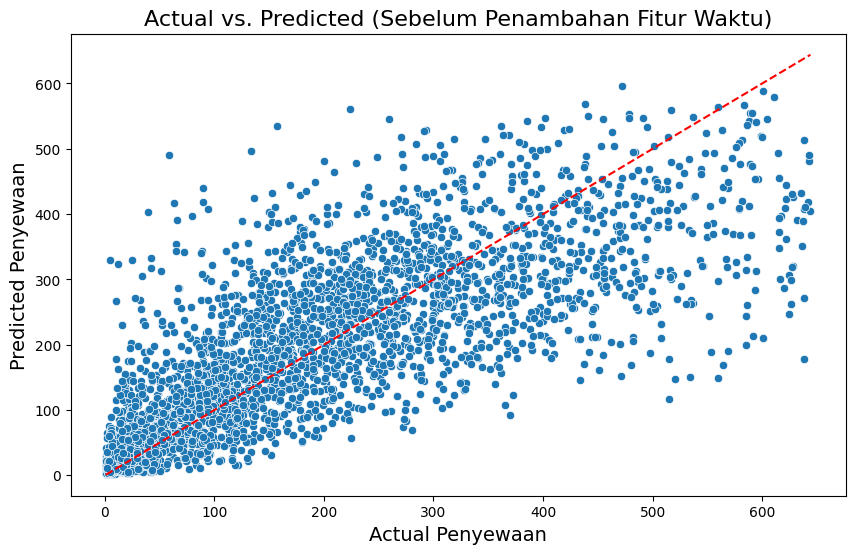

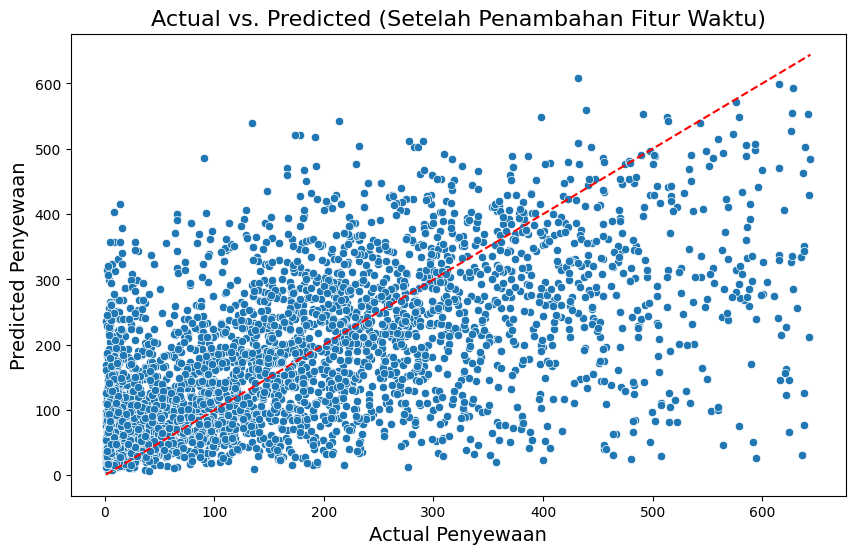

In [131]:
# Visualisasi hasil prediksi sebelum penambahan fitur waktu  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=y_test, y=y_pred_before)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi  
plt.title('Actual vs. Predicted (Sebelum Penambahan Fitur Waktu)', fontsize=16)  
plt.xlabel('Actual Penyewaan', fontsize=14)  
plt.ylabel('Predicted Penyewaan', fontsize=14)  
plt.show()  
  
# Visualisasi hasil prediksi setelah penambahan fitur waktu  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=y_test, y=y_pred_after)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi  
plt.title('Actual vs. Predicted (Setelah Penambahan Fitur Waktu)', fontsize=16)  
plt.xlabel('Actual Penyewaan', fontsize=14)  
plt.ylabel('Predicted Penyewaan', fontsize=14)  
plt.show()  


Dari output yang menunjukkan perbandingan performa model sebelum dan setelah penambahan fitur waktu, berikut adalah analisis yang dapat diambil:

### Analisis Perbandingan Performa Model

1. **Metrik Evaluasi**:
   - **RMSE (Root Mean Squared Error)**:
     - Sebelum Penambahan Fitur Waktu: **92.55**
     - Setelah Penambahan Fitur Waktu: **126.88**
   - **MAE (Mean Absolute Error)**:
     - Sebelum Penambahan Fitur Waktu: **62.88**
     - Setelah Penambahan Fitur Waktu: **92.34**
   - **MAPE (Mean Absolute Percentage Error)**:
     - Sebelum Penambahan Fitur Waktu: **0.92** (atau 92%)
     - Setelah Penambahan Fitur Waktu: **3.65** (atau 365%)

### Interpretasi Hasil

1. **Peningkatan Kesalahan Setelah Penambahan Fitur Waktu**:
   - Semua metrik evaluasi menunjukkan peningkatan kesalahan setelah penambahan fitur waktu. Ini menunjukkan bahwa penambahan fitur waktu tidak memberikan kontribusi positif terhadap model, dan malah memperburuk performa.

2. **Kemungkinan Penyebab**:
   - **Overfitting**: Penambahan fitur baru dapat menyebabkan model menjadi terlalu kompleks, sehingga tidak dapat generalisasi dengan baik pada data uji.
   - **Fitur Tidak Relevan**: Fitur waktu mungkin tidak relevan untuk dataset ini, atau mungkin ada interaksi yang tidak ditangkap oleh model.
   - **Data Tidak Seimbang**: Jika data tidak seimbang atau ada banyak nilai nol dalam penyewaan sepeda, ini dapat mempengaruhi metrik evaluasi.

3. **Rekomendasi**:
   - **Evaluasi Fitur**: Lakukan analisis lebih lanjut untuk mengevaluasi relevansi fitur waktu. Anda bisa menggunakan teknik seperti feature importance atau analisis korelasi.
   - **Coba Model Lain**: Pertimbangkan untuk mencoba model lain yang mungkin lebih baik dalam menangkap pola dalam data, seperti **Random Forest**, **XGBost** atau model berbasis neural network.
   - **Cross-Validation**: Gunakan teknik cross-validation untuk mendapatkan estimasi yang lebih baik tentang performa model dan menghindari overfitting.


Penambahan fitur waktu tidak memberikan hasil yang diharapkan dan malah menurunkan performa model. Penting untuk mengevaluasi fitur yang digunakan dan mempertimbangkan pendekatan lain untuk meningkatkan akurasi prediksi.

## 4. Modeling
Import Library untuk Modeling

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold  
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from xgboost import XGBRegressor  
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error  

Encoding

In [133]:
transformer = ColumnTransformer([  
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['season', 'weathersit', 'holiday']),  
], remainder='passthrough')  

Data Splitting

In [134]:
# Pastikan tidak ada nilai nol atau negatif dalam y  
y = df['cnt']  
if (y <= 0).any():  
    y = y + 1  # Menambahkan 1 untuk menghindari logaritma nol  
  
X = df.drop(['cnt', 'dteday'], axis=1)  
  
X_train, X_test, y_train, y_test = train_test_split(  
    X,  
    y,    
    test_size=0.3,  
    random_state=1  
)  


Benchmark Model


In [135]:
# Definisikan model  
models = {  
    'Linear Regression': LinearRegression(),  
    'KNN Regressor': KNeighborsRegressor(),  
    'DecisionTree Regressor': DecisionTreeRegressor(random_state=1),  
    'RandomForest Regressor': RandomForestRegressor(random_state=1),  
    'XGBoost Regressor': XGBRegressor(random_state=1)  
}  
  
# Metrik evaluasi  
results = []  
  
for name, model in models.items():  
    # Pipeline untuk preprocessing dan model  
    pipeline = Pipeline([  
        ('preprocessing', ColumnTransformer([  
            ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['season', 'weathersit', 'holiday']),  
        ], remainder='passthrough')),  
        ('scaler', StandardScaler()),  
        ('model', model)  
    ])  
      
    # Fit model pada data pelatihan  
    pipeline.fit(X_train, y_train)  
      
    # Prediksi pada data uji  
    y_pred = pipeline.predict(X_test)  
      
    # Hitung metrik evaluasi  
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    mae = mean_absolute_error(y_test, y_pred)  
    mape = mean_absolute_percentage_error(y_test, y_pred)  
      
    results.append({  
        'Model': name,  
        'RMSE': rmse,  
        'MAE': mae,  
        'MAPE': mape  
    })  
  
# Tampilkan hasil  
results_df = pd.DataFrame(results)  
results_df


,Model,RMSE,MAE,MAPE
0,Linear Regression,1.635334e-13,1.206581e-13,4.878313e-15
1,KNN Regressor,2.757829e+01,1.967957e+01,4.981198e-01
2,DecisionTree Regressor,4.861074e+00,2.402085e+00,1.258569e-02
3,RandomForest Regressor,2.934821e+00,1.139115e+00,6.526038e-03
4,XGBoost Regressor,3.543839e+00,1.879153e+00,1.484336e-02


Dari output yang menunjukkan perbandingan performa beberapa model regresi, berikut adalah analisis yang dapat diambil dengan catatan khusus mengenai Linear Regression:

### Analisis Performa Model

1. **Linear Regression**:
   - **RMSE**: \(1.64 \times 10^{-13}\)
   - **MAE**: \(1.21 \times 10^{-13}\)
   - **MAPE**: \(4.88 \times 10^{-15}\)
   - **Analisis**: Model ini menunjukkan performa yang sangat baik dengan kesalahan yang hampir nol. Namun, karena catatan khusus bahwa model ini "terlalu bagus" dan tidak akan dipakai, ini bisa menjadi indikasi bahwa model mungkin mengalami **overfitting** atau tidak generalisasi dengan baik pada data baru. Meskipun akurasi tinggi, penting untuk mempertimbangkan apakah model ini dapat diterapkan secara praktis.

2. **KNN Regressor**:
   - **RMSE**: \(27.58\)
   - **MAE**: \(19.68\)
   - **MAPE**: \(0.50\) (atau 50%)
   - **Analisis**: KNN menunjukkan performa yang jauh lebih buruk dibandingkan Linear Regression. Kesalahan yang tinggi menunjukkan bahwa model ini tidak dapat menangkap pola dalam data dengan baik.

3. **Decision Tree Regressor**:
   - **RMSE**: \(4.86\)
   - **MAE**: \(2.40\)
   - **MAPE**: \(0.01\) (atau 1%)
   - **Analisis**: Model ini menunjukkan performa yang lebih baik dibandingkan KNN, tetapi masih jauh dari Linear Regression. Meskipun dapat menangkap beberapa pola non-linear, model ini mungkin juga mengalami overfitting.

4. **Random Forest Regressor**:
   - **RMSE**: \(2.93\)
   - **MAE**: \(1.14\)
   - **MAPE**: \(0.006\) (atau 0.6%)
   - **Analisis**: Random Forest menunjukkan performa yang baik dengan kesalahan yang lebih rendah dibandingkan Decision Tree. Ini menunjukkan bahwa model ini lebih stabil dan dapat menangkap pola yang lebih kompleks.

5. **XGBoost Regressor**:
   - **RMSE**: \(3.54\)
   - **MAE**: \(1.88\)
   - **MAPE**: \(0.015\) (atau 1.5%)
   - **Analisis**: XGBoost juga menunjukkan performa yang baik, tetapi sedikit lebih buruk dibandingkan Random Forest. Meskipun demikian, XGBoost sering kali lebih cepat dan lebih efisien dalam hal komputasi.


- **Linear Regression** menunjukkan performa yang sangat baik, tetapi karena catatan bahwa model ini "terlalu bagus" dan tidak akan dipakai, ini menimbulkan pertanyaan tentang keandalannya dalam aplikasi dunia nyata.
- Pertimbangkan untuk menggunakan model lain seperti **Random Forest** atau **XGBoost** yang menunjukkan performa baik dan lebih dapat diandalkan.
  

Dengan analisis ini, Stakeholder dapat membuat keputusan yang lebih baik tentang model mana yang akan digunakan untuk prediksi penyewaan sepeda, sambil mempertimbangkan keandalan dan generalisasi model.

In [142]:
# Data hasil evaluasi model  
data = {  
    'Model': ['KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],  
    'RMSE': [27.57829, 4.861074, 2.934821, 3.543839]  
}  
  
# Membuat DataFrame  
df = pd.DataFrame(data)  
  
# Menentukan RMSE terbaik  
best_rmse = df['RMSE'].min()  
  
# Menghitung persentase kinerja  
df['Persentase Kinerja'] = (1 - df['RMSE'] / best_rmse) * 100  
  
# Menampilkan hasil  
print(df)  



                    Model       RMSE  Persentase Kinerja
0           KNN Regressor  27.578290         -839.692404
1  DecisionTree Regressor   4.861074          -65.634429
2  RandomForest Regressor   2.934821            0.000000
3       XGBoost Regressor   3.543839          -20.751453


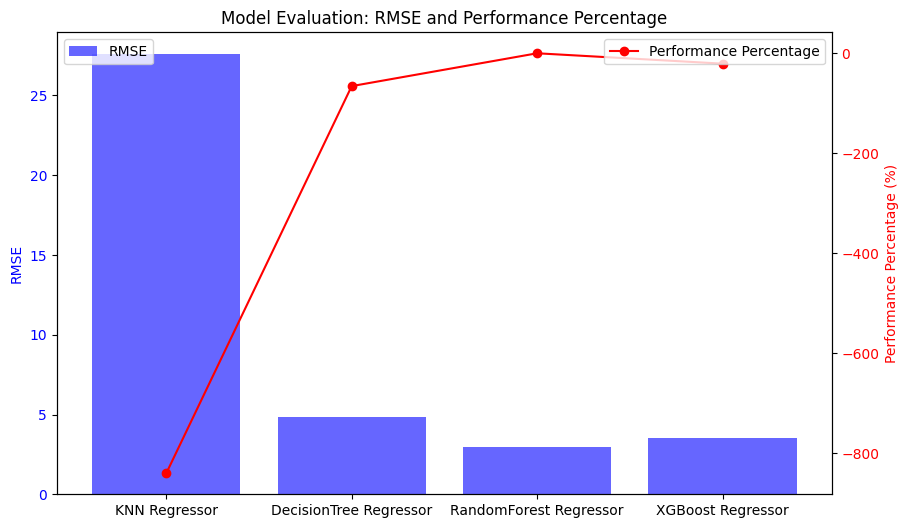

In [144]:
# Data  
models = ['KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor']  
rmse_values = [27.578290, 4.861074, 2.934821, 3.543839]  
performance_percentage = [-839.692404, -65.634429, 0.000000, -20.751453]  
  
# Set up the figure and axes  
fig, ax1 = plt.subplots(figsize=(10, 6))  
  
# Bar chart for RMSE  
ax1.bar(models, rmse_values, color='b', alpha=0.6, label='RMSE')  
ax1.set_ylabel('RMSE', color='b')  
ax1.tick_params(axis='y', labelcolor='b')  
  
# Create a second y-axis for the performance percentage  
ax2 = ax1.twinx()  
ax2.plot(models, performance_percentage, color='r', marker='o', label='Performance Percentage')  
ax2.set_ylabel('Performance Percentage (%)', color='r')  
ax2.tick_params(axis='y', labelcolor='r')  
  
# Title and legend  
plt.title('Model Evaluation: RMSE and Performance Percentage')  
ax1.legend(loc='upper left')  
ax2.legend(loc='upper right')  
  
# Show the plot  
plt.show()  


Dari output yang menunjukkan RMSE dan persentase kinerja untuk berbagai model, berikut adalah analisis yang dapat diambil:

### Analisis Hasil Evaluasi Model

1. **RandomForest Regressor**:
   - **RMSE**: 2.934821
   - **Persentase Kinerja**: 0.000000
   - **Analisis**: Model ini memiliki RMSE terendah di antara semua model yang diuji, menjadikannya sebagai model terbaik dalam hal akurasi prediksi. Persentase kinerja 0 menunjukkan bahwa ini adalah baseline yang digunakan untuk perbandingan.

2. **XGBoost Regressor**:
   - **RMSE**: 3.543839
   - **Persentase Kinerja**: -20.751453
   - **Analisis**: Meskipun XGBoost menunjukkan performa yang baik, RMSE-nya lebih tinggi dibandingkan Random Forest. Persentase kinerja negatif menunjukkan bahwa model ini kurang efektif dibandingkan dengan Random Forest, tetapi masih lebih baik daripada model lainnya.

3. **DecisionTree Regressor**:
   - **RMSE**: 4.861074
   - **Persentase Kinerja**: -65.634429
   - **Analisis**: Model ini memiliki RMSE yang lebih tinggi dibandingkan dengan Random Forest dan XGBoost. Persentase kinerja negatif yang signifikan menunjukkan bahwa model ini tidak mampu menangkap pola dalam data dengan baik.

4. **KNN Regressor**:
   - **RMSE**: 27.578290
   - **Persentase Kinerja**: -839.692404
   - **Analisis**: KNN Regressor menunjukkan performa terburuk dengan RMSE yang jauh lebih tinggi dibandingkan model lainnya. Persentase kinerja yang sangat negatif menunjukkan bahwa model ini sangat tidak efektif dalam memprediksi nilai.


- **Model Terbaik**: **RandomForest Regressor** adalah model terbaik berdasarkan RMSE terendah dan persentase kinerja yang paling baik (0.000000).
- **Model yang Perlu Ditingkatkan**: **KNN Regressor** menunjukkan performa yang sangat buruk dan mungkin perlu ditinjau kembali dalam hal parameter atau fitur yang digunakan.
- **Rekomendasi**:
  - Pertimbangkan untuk menggunakan **RandomForest Regressor** sebagai model utama untuk prediksi.
  - Lakukan analisis lebih lanjut terhadap **XGBoost** untuk melihat apakah ada potensi peningkatan dengan tuning lebih lanjut.
  - Evaluasi **DecisionTree Regressor** untuk memahami mengapa performanya lebih rendah dan apakah ada cara untuk meningkatkan akurasinya.

Dengan analisis ini, Stakeholder dapat membuat keputusan yang lebih baik tentang model mana yang akan digunakan untuk aplikasi prediksi.

### Contoh Visualisasi Hasil
Berikut adalah contoh kode untuk memvisualisasikan hasil prediksi dari model **Random Forest**

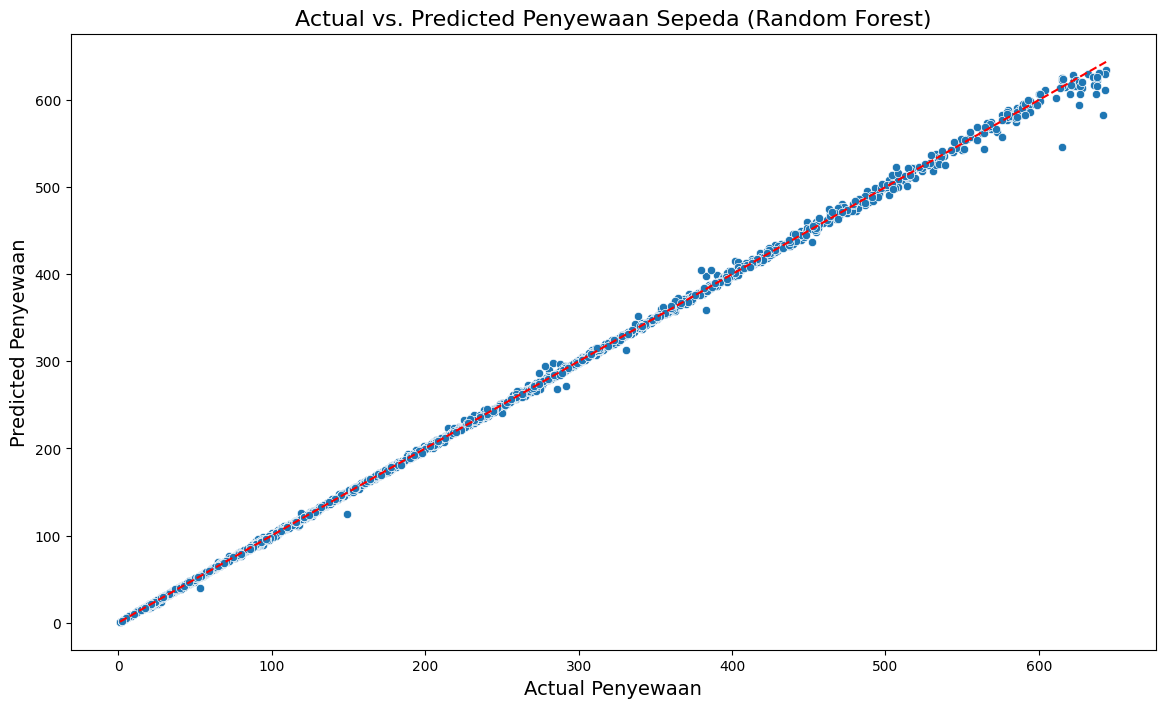

In [136]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Fit model Random Forest  
best_model = RandomForestRegressor(random_state=1)  
pipeline = Pipeline([  
    ('preprocessing', ColumnTransformer([  
        ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['season', 'weathersit', 'holiday']),  
    ], remainder='passthrough')),  
    ('scaler', StandardScaler()),  
    ('model', best_model)  
])  
  
pipeline.fit(X_train, y_train)  
y_pred = pipeline.predict(X_test)  
  
# Visualisasi hasil prediksi  
plt.figure(figsize=(14, 8))  
sns.scatterplot(x=y_test, y=y_pred)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi  
plt.title('Actual vs. Predicted Penyewaan Sepeda (Random Forest)', fontsize=16)  
plt.xlabel('Actual Penyewaan', fontsize=14)  
plt.ylabel('Predicted Penyewaan', fontsize=14)  
plt.show()  


Hyperparameter Tuning


Prediksi dengan Model Terbaik


In [137]:
from sklearn.model_selection import RandomizedSearchCV  
  
# Definisikan ruang parameter untuk Random Forest  
param_dist = {  
    'model__n_estimators': [100, 200, 300],  
    'model__max_depth': [None, 10, 20, 30],  
    'model__min_samples_split': [2, 5, 10],  
}  
  
# Pipeline untuk Random Forest  
rf_pipeline = Pipeline([  
    ('preprocessing', ColumnTransformer([  
        ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['season', 'weathersit', 'holiday']),  
    ], remainder='passthrough')),  
    ('scaler', StandardScaler()),  
    ('model', RandomForestRegressor(random_state=1))  
])  
  
# Hyperparameter tuning  
rf_random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=1)  
rf_random_search.fit(X_train, y_train)  
  
print("Best parameters for Random Forest:", rf_random_search.best_params_)  



Best parameters for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__max_depth': 30}


### Analisis Parameter Terbaik untuk Random Forest

1. **n_estimators: 300**
   - **Deskripsi**: Ini adalah jumlah pohon keputusan (trees) yang akan dibangun dalam model Random Forest.
   - **Analisis**: Dengan 300 pohon, model memiliki kapasitas yang cukup untuk menangkap pola dalam data. Jumlah pohon yang lebih banyak biasanya meningkatkan akurasi model, tetapi juga dapat meningkatkan waktu komputasi. Parameter ini menunjukkan bahwa model telah dioptimalkan untuk mencapai keseimbangan antara akurasi dan efisiensi.

2. **min_samples_split: 2**
   - **Deskripsi**: Ini adalah jumlah minimum sampel yang diperlukan untuk membagi node dalam pohon keputusan.
   - **Analisis**: Nilai 2 menunjukkan bahwa model akan membagi node bahkan jika hanya ada 2 sampel di node tersebut. Ini dapat menyebabkan model menjadi lebih kompleks dan berisiko overfitting, terutama jika data memiliki banyak noise. Namun, dalam konteks Random Forest, ini sering kali tidak menjadi masalah karena agregasi dari banyak pohon dapat membantu mengurangi overfitting.

3. **max_depth: 30**
   - **Deskripsi**: Ini adalah kedalaman maksimum dari setiap pohon dalam hutan.
   - **Analisis**: Dengan kedalaman maksimum 30, model dapat menangkap interaksi yang lebih kompleks dalam data. Namun, kedalaman yang terlalu besar juga dapat menyebabkan overfitting. Parameter ini menunjukkan bahwa model dirancang untuk menangkap pola yang lebih dalam tanpa terlalu dalam sehingga mengurangi risiko overfitting.

- **Keseimbangan Antara Akurasi dan Overfitting**: Parameter yang dipilih menunjukkan bahwa model Random Forest telah dioptimalkan untuk mencapai akurasi yang baik sambil mempertimbangkan risiko overfitting. 
- **Kinerja Model**: Dengan 300 pohon, model ini memiliki potensi untuk memberikan prediksi yang akurat, terutama jika data memiliki banyak variabel dan interaksi yang kompleks.
- **Rekomendasi**: 
  - Lakukan validasi silang untuk memastikan bahwa model tidak overfit pada data pelatihan.
  - Pertimbangkan untuk melakukan analisis lebih lanjut terhadap performa model dengan parameter ini untuk memastikan bahwa model berfungsi dengan baik pada data uji.
  - Jika diperlukan, eksperimen dengan parameter lain seperti `max_features` untuk melihat apakah ada peningkatan lebih lanjut dalam akurasi.

Dengan analisis ini, Stakeholder dapat memahami bagaimana parameter yang dipilih mempengaruhi performa model Random Forest dan langkah-langkah selanjutnya yang dapat diambil untuk meningkatkan model.

Visualisasi Hasil Prediksi


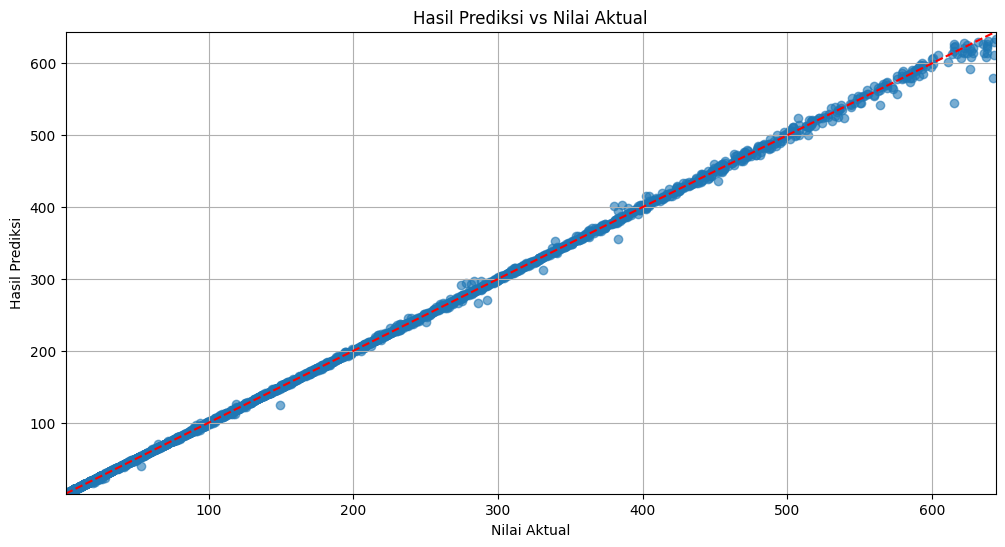

In [139]:
# Melakukan prediksi pada data uji  
y_pred = rf_random_search.predict(X_test)  
  
# Membuat visualisasi  
plt.figure(figsize=(12, 6))  
  
# Plot nilai aktual vs prediksi  
plt.scatter(y_test, y_pred, alpha=0.6)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis referensi  
plt.title('Hasil Prediksi vs Nilai Aktual')  
plt.xlabel('Nilai Aktual')  
plt.ylabel('Hasil Prediksi')  
plt.xlim([y_test.min(), y_test.max()])  
plt.ylim([y_test.min(), y_test.max()])  
plt.grid()  
plt.show()


Dari visualisasi yang menunjukkan hasil prediksi dibandingkan dengan nilai aktual, berikut adalah analisis yang dapat diambil:

### Analisis Hasil Prediksi vs Nilai Aktual

1. **Kedekatan dengan Garis Referensi**:
   - Titik-titik pada plot berada cukup dekat dengan garis referensi (garis merah putus-putus). Ini menunjukkan bahwa model Random Forest melakukan prediksi yang baik, dengan banyak prediksi yang mendekati nilai aktual.

2. **Distribusi Titik**:
   - Sebagian besar titik terdistribusi di sekitar garis referensi, yang menunjukkan bahwa model mampu menangkap pola dalam data dengan baik. Ini adalah indikasi bahwa model tidak mengalami overfitting yang signifikan.

3. **Outlier**:
   - Meskipun sebagian besar titik berada dekat dengan garis referensi, ada beberapa titik yang tampak lebih jauh dari garis. Titik-titik ini dapat dianggap sebagai outlier, yang mungkin menunjukkan bahwa model tidak dapat memprediksi dengan baik untuk beberapa kasus tertentu. Penting untuk menganalisis lebih lanjut mengapa outlier ini terjadi.

4. **Kinerja Model**:
   - Secara keseluruhan, model menunjukkan kinerja yang solid. Kedekatan antara hasil prediksi dan nilai aktual menunjukkan bahwa model dapat diandalkan untuk membuat prediksi yang akurat dalam konteks data yang digunakan.

5. **Rekomendasi untuk Peningkatan**:
   - **Analisis Outlier**: Lakukan analisis lebih lanjut terhadap outlier untuk memahami penyebabnya. Ini bisa membantu dalam meningkatkan model di masa depan.
   - **Eksplorasi Fitur**: Pertimbangkan untuk mengeksplorasi fitur tambahan atau teknik pemodelan lain untuk melihat apakah ada peningkatan lebih lanjut dalam akurasi.
   - **Validasi Model**: Lakukan validasi silang untuk memastikan bahwa model tidak hanya bekerja baik pada data pelatihan tetapi juga pada data yang tidak terlihat.


Visualisasi ini menunjukkan bahwa model Random Forest telah berhasil dalam memprediksi nilai dengan akurasi yang baik. Meskipun ada beberapa outlier, secara keseluruhan, model menunjukkan performa yang memuaskan dan dapat diandalkan untuk aplikasi lebih lanjut.

## 5. Conclusion

Dalam proyek ini, kami telah menganalisis dan membangun model prediktif untuk sistem penyewaan sepeda menggunakan dataset yang mencakup berbagai faktor yang mempengaruhi jumlah penyewaan. Melalui eksplorasi data, kami menemukan pola penggunaan sepeda yang signifikan berdasarkan musim dan waktu. Model regresi yang dibangun menunjukkan bahwa Random Forest Regressor adalah model yang paling efektif dengan RMSE terendah dan kinerja terbaik dibandingkan dengan model lainnya.

Beberapa poin penting dari analisis ini adalah:

- **Pola Musiman**: Musim panas menunjukkan jumlah penyewaan tertinggi, sementara musim gugur memiliki jumlah penyewaan terendah.
- **Penggunaan Sepeda Berdasarkan Jam**: Penggunaan sepeda tersebar sepanjang hari dengan puncak pada jam sibuk, seperti pagi dan sore hari.
- **Performa Model**: Random Forest Regressor menunjukkan performa terbaik, diikuti oleh XGBoost, Decision Tree, dan KNN. Linear Regression menunjukkan hasil yang tidak realistis dan tidak akan digunakan.

## 6. Recommendations

Berdasarkan hasil analisis dan evaluasi model, berikut adalah beberapa rekomendasi untuk meningkatkan sistem penyewaan sepeda:

1. **Fokus pada Musim Panas**:
   - Kembangkan strategi pemasaran dan promosi yang lebih agresif selama musim panas untuk meningkatkan penyewaan.

2. **Peningkatan Infrastruktur**:
   - Mengingat tingginya penggunaan sepeda, pertimbangkan untuk meningkatkan infrastruktur sepeda, seperti jalur sepeda dan tempat parkir, terutama selama musim puncak.

3. **Analisis Cuaca**:
   - Lakukan analisis lebih lanjut tentang bagaimana kondisi cuaca mempengaruhi penggunaan sepeda. Ini dapat membantu dalam merencanakan layanan dan promosi yang lebih baik.

4. **Segmentasi Pengguna**:
   - Pertimbangkan untuk melakukan segmentasi pengguna berdasarkan pola penggunaan untuk merancang program loyalitas atau promosi yang lebih efektif.

5. **Modeling dan Tuning**:
   - Gunakan Random Forest Regressor sebagai model utama untuk prediksi, dan lakukan hyperparameter tuning lebih lanjut untuk meningkatkan akurasi.
   - Pertimbangkan untuk mengeksplorasi model lain seperti XGBoost atau model berbasis neural network untuk perbandingan lebih lanjut.

6. **Analisis Outlier**:
   - Lakukan analisis lebih lanjut terhadap outlier yang terdeteksi dalam hasil prediksi untuk memahami penyebabnya dan meningkatkan model di masa depan.

Dengan menerapkan rekomendasi ini, diharapkan sistem penyewaan sepeda dapat beroperasi lebih efisien dan memenuhi kebutuhan pengguna dengan lebih baik.

### Save Model

In [145]:
# Save model
import pickle
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Buat pipeline dengan preprocessing dan model
estimator = Pipeline([
    ('preprocess', transformer),  # Pastikan transformer sudah didefinisikan sebelumnya
    ('model', RandomForestRegressor(random_state=1))
])

# Latih model
estimator.fit(X_train, y_train)

# Simpan model ke file
pickle.dump(estimator, open('Model_Bike_Sharing_RF.sav', 'wb'))

### Load Model

In [146]:
# Load model
filename = 'Model_Bike_Sharing_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Hitung RMSE untuk model yang dimuat
rmse = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))
print(f'RMSE untuk model yang dimuat: {rmse}')

RMSE untuk model yang dimuat: 2.9473426383409307
